In [1]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## 2 level QGB (total pegs: 3)

Measurement results (bitstrings):
010 : 5021
100 : 2505
001 : 2474


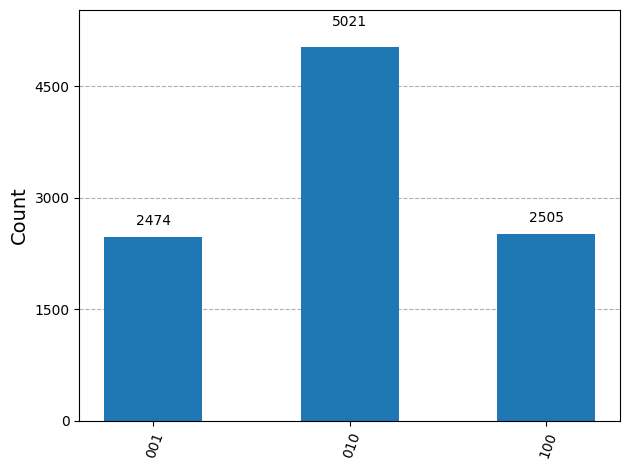

In [3]:
q = QuantumRegister(6, 'q')
c = ClassicalRegister(3, 'c')
qc = QuantumCircuit(q, c)


qc.x(q[3])
qc.h(q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])

qc.cswap(q[0], q[4], q[5])
qc.measure(q[1], c[0])
qc.measure(q[3], c[1])
qc.measure(q[5], c[2])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()
print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()

## 4 level QGB (total pegs: 10)

Measurement results (bitstrings):
0000010000 : 2569
0001000000 : 2465
0000000100 : 1253
0000100000 : 1252
0000001000 : 1244
0100000000 : 1217


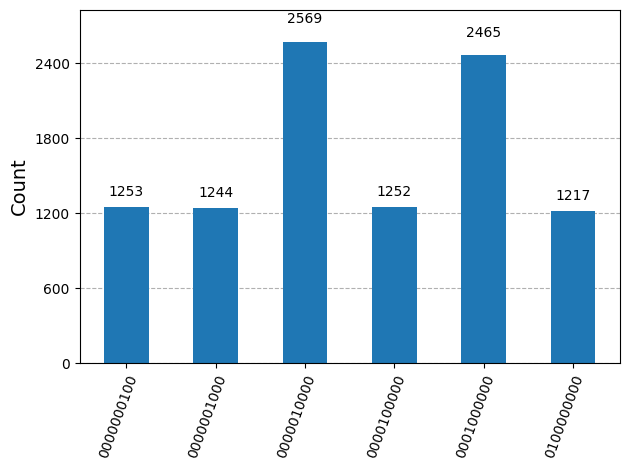

In [4]:

q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')
qc = QuantumCircuit(q, c)

qc.reset(q[0])
qc.x(q[5])
qc.h(q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6], q[0])

qc.cswap(q[0], q[5], q[6])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[4], q[5])

qc.reset(q[0])
qc.h(q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[8], q[0])
qc.cswap(q[0], q[8], q[9])

for i in range(1, 10):
    qc.measure(q[i], c[i])

backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

plot_histogram(counts)
plt.show()


### Expecting a normal distribution, but its not turning out to be. What are the registers to measure for a n-level QGB in general? 

_____

## Biased 4 level QGB

Measurement results (bitstrings):
0000000100 : 4104
0000010000 : 1937
0001000000 : 1597
0000001000 : 1380
0100000000 : 500
0000100000 : 482


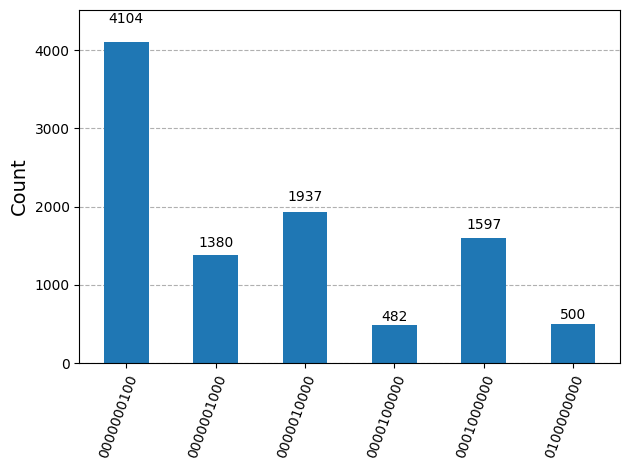

In [5]:
q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')
qc = QuantumCircuit(q, c)


qc.reset(q[0])
qc.x(q[5])
qc.rx(2*np.pi/3, q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])

qc.reset(q[0])
qc.rx(2*np.pi/3, q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[6], q[0])

qc.cswap(q[0], q[5], q[6])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[4], q[5])

qc.reset(q[0])
qc.rx(2*np.pi/3, q[0])
qc.cswap(q[0], q[1], q[2])
qc.cx(q[2], q[0])
qc.cswap(q[0], q[2], q[3])
qc.cx(q[3], q[0])
qc.cswap(q[0], q[3], q[4])
qc.cx(q[4], q[0])
qc.cswap(q[0], q[4], q[5])
qc.cx(q[5], q[0])
qc.cswap(q[0], q[5], q[6])
qc.cx(q[6], q[0])
qc.cswap(q[0], q[6], q[7])
qc.cx(q[7], q[0])
qc.cswap(q[0], q[7], q[8])
qc.cx(q[8], q[0])
qc.cswap(q[0], q[8], q[9])

# Measurements
for i in range(1, 10):
    qc.measure(q[i], c[i])

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
compiled = transpile(qc, backend)
job = backend.run(compiled, shots=1e4)
counts = job.result().get_counts()

# Display results
print("Measurement results (bitstrings):")
for bitstring, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{bitstring} : {count}")

# Plot histogram
plot_histogram(counts)
plt.show()


### How to generalize the measurements ?